In [1]:
import os
#from google.colab import drive

import numpy as np
from numpy.random import seed
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

import joblib as jb
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

import panel as pn
#from bokeh.models.formatters import PrintfTickFormatter
#import holoviews as hv
import param

pn.extension(sizing_mode="stretch_width")

# Nova seção

In [2]:
#reimporta os modelos treinados e as bases de dados
x_test = pd.read_csv('Deploy/x_test.csv')
y_test = pd.read_csv('Deploy/y_test.csv')
lin_reg = jb.load('Deploy/lin_reg.joblib')
svm_reg = jb.load('Deploy/svm_reg.joblib')
rnn_model = keras.models.load_model('Deploy/rnn_model3.h5')
lstm_model = keras.models.load_model('Deploy/lstm_model3.h5')

In [3]:
#OneHotEncoder

from sklearn.preprocessing import OneHotEncoder


#Escalonamento

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#Pipeline com imputador usando estatégia da mediana escalonamento por padronização (normalização)

from sklearn.pipeline import Pipeline
num_pipeline=Pipeline([('st_scaler', StandardScaler())])

#Column Transformer

from sklearn.compose import ColumnTransformer

#Criando grupos de características numéricas e categóricas

num_att=list()
cat_att=list()

for i in x_test.columns:
  if type(x_test[i][1])==str:
    cat_att.append(i)
  else:
    num_att.append(i)

#Pipeline final

full_pipeline=ColumnTransformer([('num',num_pipeline,num_att),
                                 ('cat',OneHotEncoder(drop='first').fit(x_test),cat_att)])

print(num_att)
print(cat_att)

['RADIACAO GLOBAL(Kj/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)', 'VENTO, VELOCIDADE HORARIA(m/s)', 'PRECIP_30D', 'PRECIP_90D', 'PRECIP_180D', 'RADIACAO GLOBAL(Kj/m²)_N', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)_N', 'VENTO, VELOCIDADE HORARIA(m/s)_N', 'PRECIP_30D_N', 'PRECIP_90D_N', 'PRECIP_180D_N', 'RADIACAO GLOBAL(Kj/m²)_N/I', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)_N/I', 'VENTO, VELOCIDADE HORARIA(m/s)_N/I', 'PRECIP_30D_N/I', 'PRECIP_90D_N/I', 'PRECIP_180D_N/I', 'RADIACAO GLOBAL(Kj/m²)_NE', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)_NE', 'VENTO, VELOCIDADE HORARIA(m/s)_NE', 'PRECIP_30D_NE', 'PRECIP_90D_NE', 'PRECIP_180D_NE', 'RADIACAO GLOBAL(Kj/m²)_S', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)_S', 'VENTO, VELOCIDADE HORARIA(m/s)_S', 'PRECIP_30D_S', 'PRECIP_90D_S', 'PRECIP_180D_S', 'RADIACAO GLOBAL(Kj/m²)_SE', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)_SE', 'VENTO, VELOCIDADE HORARIA(m/s)_SE', 'PRECIP_30D_SE', 'PRECIP_90D_SE', 'PRECIP_180D_SE']
['id_subsistema

In [4]:
#features preparadas
x_test_prep=full_pipeline.fit_transform(x_test)

In [5]:
#gera as dropdowns e os sliders
subsistema_drop=pn.widgets.Select(name='Subsistema', options=['Norte', 'Nordeste', 'Sudeste', 'Sul'], margin=(0, 5, 5, 10))
modelo_drop=pn.widgets.Select(name='Escolha o Modelo', options=["Regressão Linear", "SVM", "RNN", "LSTM"], margin=(0, 5, 5, 10))

slider_1 = pn.widgets.FloatSlider(name="CO", start=x_test[x_test.columns[1]].min(), end=x_test[x_test.columns[1]].max(), step=0.01, value=x_test[x_test.columns[1]].mean())
slider_2 = pn.widgets.FloatSlider(name="CO", start=x_test[x_test.columns[2]].min(), end=x_test[x_test.columns[2]].max(), step=0.01, value=x_test[x_test.columns[2]].mean())
slider_3 = pn.widgets.FloatSlider(name="CO", start=x_test[x_test.columns[3]].min(), end=x_test[x_test.columns[3]].max(), step=0.01, value=x_test[x_test.columns[3]].mean())
slider_4 = pn.widgets.FloatSlider(name="CO", start=x_test[x_test.columns[4]].min(), end=x_test[x_test.columns[4]].max(), step=0.01, value=x_test[x_test.columns[4]].mean())
slider_5 = pn.widgets.FloatSlider(name="CO", start=x_test[x_test.columns[5]].min(), end=x_test[x_test.columns[5]].max(), step=0.01, value=x_test[x_test.columns[5]].mean())
slider_6 = pn.widgets.FloatSlider(name="CO", start=x_test[x_test.columns[6]].min(), end=x_test[x_test.columns[6]].max(), step=0.01, value=x_test[x_test.columns[6]].mean())
slider_7 = pn.widgets.FloatSlider(name=str(x_test.columns[9])[-1:], start=x_test[x_test.columns[7]].min(), end=x_test[x_test.columns[7]].max(), step=0.01, value=x_test[x_test.columns[7]].mean())
slider_8 = pn.widgets.FloatSlider(name=str(x_test.columns[9])[-1:], start=x_test[x_test.columns[8]].min(), end=x_test[x_test.columns[8]].max(), step=0.01, value=x_test[x_test.columns[8]].mean())
slider_9 = pn.widgets.FloatSlider(name=str(x_test.columns[9])[-1:], start=x_test[x_test.columns[9]].min(), end=x_test[x_test.columns[9]].max(), step=0.01, value=x_test[x_test.columns[9]].mean())
slider_10 = pn.widgets.FloatSlider(name=str(x_test.columns[10])[-1:], start=x_test[x_test.columns[10]].min(), end=x_test[x_test.columns[10]].max(), step=0.01, value=x_test[x_test.columns[10]].mean())
slider_11= pn.widgets.FloatSlider(name=str(x_test.columns[11])[-1:], start=x_test[x_test.columns[11]].min(), end=x_test[x_test.columns[11]].max(), step=0.01, value=x_test[x_test.columns[11]].mean())
slider_12 = pn.widgets.FloatSlider(name=str(x_test.columns[12])[-1:], start=x_test[x_test.columns[12]].min(), end=x_test[x_test.columns[12]].max(), step=0.01, value=x_test[x_test.columns[12]].mean())
slider_13 = pn.widgets.FloatSlider(name=str(x_test.columns[13])[-3:], start=x_test[x_test.columns[13]].min(), end=x_test[x_test.columns[13]].max(), step=0.01, value=x_test[x_test.columns[13]].mean())
slider_14 = pn.widgets.FloatSlider(name=str(x_test.columns[14])[-3:], start=x_test[x_test.columns[14]].min(), end=x_test[x_test.columns[14]].max(), step=0.01, value=x_test[x_test.columns[14]].mean())
slider_15 = pn.widgets.FloatSlider(name=str(x_test.columns[15])[-3:], start=x_test[x_test.columns[15]].min(), end=x_test[x_test.columns[15]].max(), step=0.01, value=x_test[x_test.columns[15]].mean())
slider_16 = pn.widgets.FloatSlider(name=str(x_test.columns[16])[-3:], start=x_test[x_test.columns[16]].min(), end=x_test[x_test.columns[16]].max(), step=0.01, value=x_test[x_test.columns[16]].mean())
slider_17 = pn.widgets.FloatSlider(name=str(x_test.columns[17])[-3:], start=x_test[x_test.columns[17]].min(), end=x_test[x_test.columns[17]].max(), step=0.01, value=x_test[x_test.columns[17]].mean())
slider_18 = pn.widgets.FloatSlider(name=str(x_test.columns[18])[-3:], start=x_test[x_test.columns[18]].min(), end=x_test[x_test.columns[18]].max(), step=0.01, value=x_test[x_test.columns[18]].mean())
slider_19 = pn.widgets.FloatSlider(name=str(x_test.columns[19])[-2:], start=x_test[x_test.columns[19]].min(), end=x_test[x_test.columns[19]].max(), step=0.01, value=x_test[x_test.columns[19]].mean())
slider_20 = pn.widgets.FloatSlider(name=str(x_test.columns[20])[-2:], start=x_test[x_test.columns[20]].min(), end=x_test[x_test.columns[20]].max(), step=0.01, value=x_test[x_test.columns[20]].mean())
slider_21 = pn.widgets.FloatSlider(name=str(x_test.columns[21])[-2:], start=x_test[x_test.columns[21]].min(), end=x_test[x_test.columns[21]].max(), step=0.01, value=x_test[x_test.columns[21]].mean())
slider_22 = pn.widgets.FloatSlider(name=str(x_test.columns[22])[-2:], start=x_test[x_test.columns[22]].min(), end=x_test[x_test.columns[22]].max(), step=0.01, value=x_test[x_test.columns[22]].mean())
slider_23 = pn.widgets.FloatSlider(name=str(x_test.columns[23])[-2:], start=x_test[x_test.columns[23]].min(), end=x_test[x_test.columns[23]].max(), step=0.01, value=x_test[x_test.columns[23]].mean())
slider_24 = pn.widgets.FloatSlider(name=str(x_test.columns[24])[-2:], start=x_test[x_test.columns[24]].min(), end=x_test[x_test.columns[24]].max(), step=0.01, value=x_test[x_test.columns[24]].mean())
slider_25 = pn.widgets.FloatSlider(name=str(x_test.columns[25])[-1:], start=x_test[x_test.columns[25]].min(), end=x_test[x_test.columns[25]].max(), step=0.01, value=x_test[x_test.columns[25]].mean())
slider_26 = pn.widgets.FloatSlider(name=str(x_test.columns[26])[-1:], start=x_test[x_test.columns[26]].min(), end=x_test[x_test.columns[26]].max(), step=0.01, value=x_test[x_test.columns[26]].mean())
slider_27 = pn.widgets.FloatSlider(name=str(x_test.columns[27])[-1:], start=x_test[x_test.columns[27]].min(), end=x_test[x_test.columns[27]].max(), step=0.01, value=x_test[x_test.columns[27]].mean())
slider_28 = pn.widgets.FloatSlider(name=str(x_test.columns[28])[-1:], start=x_test[x_test.columns[28]].min(), end=x_test[x_test.columns[28]].max(), step=0.01, value=x_test[x_test.columns[28]].mean())
slider_29 = pn.widgets.FloatSlider(name=str(x_test.columns[29])[-1:], start=x_test[x_test.columns[29]].min(), end=x_test[x_test.columns[29]].max(), step=0.01, value=x_test[x_test.columns[29]].mean())
slider_30 = pn.widgets.FloatSlider(name=str(x_test.columns[30])[-1:], start=x_test[x_test.columns[30]].min(), end=x_test[x_test.columns[30]].max(), step=0.01, value=x_test[x_test.columns[30]].mean())
slider_31 = pn.widgets.FloatSlider(name=str(x_test.columns[31])[-2:], start=x_test[x_test.columns[31]].min(), end=x_test[x_test.columns[31]].max(), step=0.01, value=x_test[x_test.columns[31]].mean())
slider_32 = pn.widgets.FloatSlider(name=str(x_test.columns[32])[-2:], start=x_test[x_test.columns[32]].min(), end=x_test[x_test.columns[32]].max(), step=0.01, value=x_test[x_test.columns[32]].mean())
slider_33 = pn.widgets.FloatSlider(name=str(x_test.columns[33])[-2:], start=x_test[x_test.columns[33]].min(), end=x_test[x_test.columns[33]].max(), step=0.01, value=x_test[x_test.columns[33]].mean())
slider_34 = pn.widgets.FloatSlider(name=str(x_test.columns[34])[-2:], start=x_test[x_test.columns[34]].min(), end=x_test[x_test.columns[34]].max(), step=0.01, value=x_test[x_test.columns[34]].mean())
slider_35 = pn.widgets.FloatSlider(name=str(x_test.columns[35])[-2:], start=x_test[x_test.columns[35]].min(), end=x_test[x_test.columns[35]].max(), step=0.01, value=x_test[x_test.columns[35]].mean())
slider_36 = pn.widgets.FloatSlider(name=str(x_test.columns[36])[-2:], start=x_test[x_test.columns[36]].min(), end=x_test[x_test.columns[36]].max(), step=0.01, value=x_test[x_test.columns[36]].mean())

seletor=pn.Column(
    'RADIACAO GLOBAL(Kj/m²)',
    pn.layout.Divider(margin=(-20, 0, 0, 0)),
    pn.Row(slider_1, slider_7, slider_13, slider_19, slider_25, slider_31),
    'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)',
    pn.layout.Divider(margin=(-20, 0, 0, 0)),
    pn.Row(slider_2, slider_8, slider_14, slider_20, slider_26, slider_32),
    'VENTO, VELOCIDADE HORARIA(m/s)',
    pn.layout.Divider(margin=(-20, 0, 0, 0)),
    pn.Row(slider_3, slider_9, slider_15, slider_21, slider_27, slider_33),
    'PRECIPAÇÃO ACUMULADA 30 DIAS',
    pn.layout.Divider(margin=(-20, 0, 0, 0)),
    pn.Row(slider_4, slider_10, slider_16, slider_22, slider_28, slider_34),
    'PRECIPAÇÃO ACUMULADA 90 DIAS',
    pn.layout.Divider(margin=(-20, 0, 0, 0)),
    pn.Row(slider_5, slider_11, slider_17, slider_23, slider_29, slider_35),
    'PRECIPAÇÃO ACUMULADA 180 DIAS',
    pn.layout.Divider(margin=(-20, 0, 0, 0)),
    pn.Row(slider_6, slider_12, slider_18, slider_24, slider_30, slider_36),
)


In [6]:
#gera o botão para calcular o despacho térmico
class ActionExample(param.Parameterized):

    action = param.Action(lambda x: x.param.trigger('action'), label='Calcular Despacho')
    
    resposta = pn.indicators.Number(name='Despacho Térmico', value=0,font_size='27pt')
        
    @param.depends('action')
    def predicao(self):
      x_test2=x_test.copy()

      if subsistema_drop.value=='Nordeste':
        subsis='NE'
      elif subsistema_drop.value=='Sul':
        subsis='S'
      elif subsistema_drop.value=='Sudeste':
        subsis='SE'
      else:
        subsis='N'

      x_test2.loc[len(x_test2)]= np.array([subsis,slider_1.value, slider_2.value, slider_3.value, slider_4.value, slider_5.value, slider_6.value,
          slider_7.value, slider_8.value, slider_9.value, slider_10.value, slider_11.value, slider_12.value,
          slider_13.value, slider_14.value, slider_15.value, slider_16.value, slider_17.value, slider_18.value,
          slider_19.value, slider_20.value, slider_21.value, slider_22.value, slider_23.value, slider_24.value,
          slider_25.value, slider_26.value, slider_27.value, slider_28.value, slider_29.value, slider_30.value,
          slider_31.value, slider_32.value, slider_33.value, slider_34.value, slider_35.value, slider_36.value])

      input_prep=full_pipeline.fit_transform(x_test2)[len(x_test2)-1]
      input_prep=input_prep.reshape(1,-1)

      dict_modelo={"Regressão Linear":lin_reg, "SVM":svm_reg, "RNN":rnn_model, "LSTM":lstm_model}

      if modelo_drop.value=="Regressão Linear" or modelo_drop.value=="SVM":
        self.resposta.value=round(dict_modelo[modelo_drop.value].predict(input_prep)[0],2)
      else:
        self.resposta.value=round(float(dict_modelo[modelo_drop.value].predict(input_prep)[0][0]),2)
      return self.resposta
    
action_example = ActionExample()

component = pn.Column(
    pn.Column(
        pn.Column(pn.panel(action_example, show_name=False, margin=0, widgets={"action": {"button_type": "primary"}, "resposta": {"disabled": False}})),
        pn.panel(action_example.predicao, width=300), max_width=600)
)

In [7]:
#função para gerar e salvar os plots por modelo e subsistema
def plot_predict2(modelo, subsistema):
  if subsistema=='Nordeste':
    label_panel = y_test[y_test['id_subsistema']=='NE']
    x_prep_panel = x_test_prep[x_test_prep[:,36]==1]
  elif subsistema=='Sul':
    label_panel = y_test[y_test['id_subsistema']=='S']
    x_prep_panel = x_test_prep[x_test_prep[:,37]==1]
  elif subsistema=='Sudeste':
    label_panel = y_test[y_test['id_subsistema']=='SE']
    x_prep_panel = x_test_prep[x_test_prep[:,38]==1]
  else:
    label_panel = y_test[y_test['id_subsistema']=='N']
    x_test_prep_not_ne = x_test_prep[x_test_prep[:,36]==0]
    x_test_prep_not_ne_s = x_test_prep_not_ne[x_test_prep_not_ne[:,37]==0]
    x_prep_panel = x_test_prep_not_ne_s[x_test_prep_not_ne_s[:,38]==0]
  
  if modelo=='Regressão Linear':
    panel_predict = lin_reg.predict(x_prep_panel)
  elif modelo=='SVM':
    panel_predict = svm_reg.predict(x_prep_panel)
  elif modelo=='RNN':
    panel_predict = rnn_model.predict(x_prep_panel)
  else:
    panel_predict = lstm_model.predict(x_prep_panel)
  
  fig, ax = plt.subplots(figsize=(12,9))
  ax.plot(label_panel.index, label_panel['val_verifgeracao'], zorder=1)
  ax.plot(label_panel.index, panel_predict, 'r--', zorder=-1)
  ax.set_xlabel('tempo')
  ax.set_ylabel('MWh')
  ax.set_title("Previsão do Despacho Térmico para a Região " + subsistema, fontdict={'fontsize': 14, 'fontweight': 'bold'})
  ax.legend(['Label', modelo])
  
  

  return plt.savefig(str(modelo)+'_'+str(subsistema)+'.png')

In [ ]:
#RODAR APENAS SE NECESSÁRIO - loop para gerar todos os plots da função acima
modelos=["Regressão Linear", "SVM", "RNN", "LSTM"]
subsistemas=['Norte', 'Nordeste', 'Sudeste', 'Sul']

for i in modelos:
    for j in subsistemas:
        plot_predict2(i,j)

In [8]:
#gera o elemento gráfico com interação com as dropdowns
def plot_predict3(modelo, subsistema):
    modelo = modelo_drop.value
    subsistema = subsistema_drop.value
    grafico1 = pn.pane.PNG(str(modelo_drop.value)+'_'+str(subsistema_drop.value)+'.png', width=800)
    return grafico1

graf_pred = pn.interact(plot_predict3, modelo = modelo_drop, subsistema = subsistema_drop)

Traceback (most recent call last):
 File "C:\Users\Sandro\anaconda3\lib\site-packages\pyviz_comms\__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\Sandro\anaconda3\lib\site-packages\panel\viewable.py", line 272, in _on_msg
 patch.apply_to_document(doc, comm.id)
AttributeError: 'NoneType' object has no attribute 'id'

BootstrapTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [2231170678400] Row(background='WhiteSmoke', margin=(10, 10, 10, 10), sizing_mode='stretch_width')
        [0] Column(sizing_mode='stretch_width')
            [0] Card(margin=(10, 10, 10, 10), sizing_mode='stretch_width', title='Como usar esse painel')
                [0] Markdown(str, margin=(10, 10), sizing_mode='stretch_width')
                [1] Markdown(str, margin=(10, 10), sizing_mode='stretch_width')
                [2] Markdown(str, margin=(10, 10), sizing_mode='stretch_width')
                [3] Markdown(str, margin=(10, 10), sizing_mode='stretch_width')
                [4] Markdown(str, margin=(10, 10), sizing_mode='stretch_width')
                [5] Markdown(str, margin=(10, 10), sizing_mode='stretch_width')
                [6] Markdown(str, margin=(10, 10), sizing_mode='stretch_width')
            [1] Select(margin=(0, 5, 5, 10), name='Escolha o Modelo', options=['Regressão Linear', ...], sizing_mode='stretch_width', value='Regressão Linear')
            [2] Select(margin=(0, 5, 5, 10), name='Subsistema', options=['Norte', 'Nordeste', ...], sizing_mode='stretch_width', value='Norte')
            [3] Column(sizing_mode='stretch_width')
                [0] Column(max_width=600, sizing_mode='stretch_width')
                    [0] Column(sizing_mode='stretch_width')
                        [0] Button(button_type='primary', name='Calcular Despacho', sizing_mode='stretch_width')
                    [1] ParamMethod(method, sizing_mode='stretch_width', width=300)
        [1] Column(margin=(10, 10, 10, 10), sizing_mode='stretch_width')
            [0] Row(sizing_mode='stretch_width')
                [0] PNG(str, sizing_mode='stretch_width', width=800)
    [2231170678304] Row(background='WhiteSmoke', margin=(10, 10, 10, 10), sizing_mode='stretch_width')
        [0] Card(margin=(10, 10, 10, 10), sizing_mode='stretch_width', title='Parâmetros Meteorológicos...)
            [0] Column(margin=(10, 10), sizing_mode='stretch_width')
                [0] Markdown(str, sizing_mode='stretch_width')
                [1] Divider(margin=(-20, 0, 0, 0), sizing_mode='stretch_width')
                [2] Row(sizing_mode='stretch_width')
                    [0] FloatSlider(end=3427.2823396226418, name='CO', sizing_mode='stretch_width', start=-3.3202241379310347, step=0.01, value=765.828566347036)
                    [1] FloatSlider(end=3194.32740625, name='N', sizing_mode='stretch_width', start=-3.055333333333333, step=0.01, value=720.331073047414)
                    [2] FloatSlider(end=4147.82, name='N/I', sizing_mode='stretch_width', start=-3.6, step=0.01, value=364.32884997718475)
                    [3] FloatSlider(end=3390.750621052632, name='NE', sizing_mode='stretch_width', start=-3.520382978723404, step=0.01, value=798.9411818915092)
                    [4] FloatSlider(end=3764.416698412698, name='S', sizing_mode='stretch_width', start=-3.5451206896551724, step=0.01, value=709.619596042664)
                    [5] FloatSlider(end=3553.1682666666666, name='SE', sizing_mode='stretch_width', start=-3.374727272727273, step=0.01, value=742.6804808824475)
                [3] Markdown(str, sizing_mode='stretch_width')
                [4] Divider(margin=(-20, 0, 0, 0), sizing_mode='stretch_width')
                [5] Row(sizing_mode='stretch_width')
                    [0] FloatSlider(end=38.471428571428575, name='CO', sizing_mode='stretch_width', start=5.983673469387755, step=0.01, value=24.092595417267678)
                    [1] FloatSlider(end=35.43333333333333, name='N', sizing_mode='stretch_width', start=17.65, step=0.01, value=26.324240209847545)
                    [2] FloatSlider(end=39.1, name='N/I', sizing_mode='stretch_width', step=0.01, value=12.6525507295944)
                    [3] FloatSlider(end=35.672463768115946, name='NE', sizing_mode=
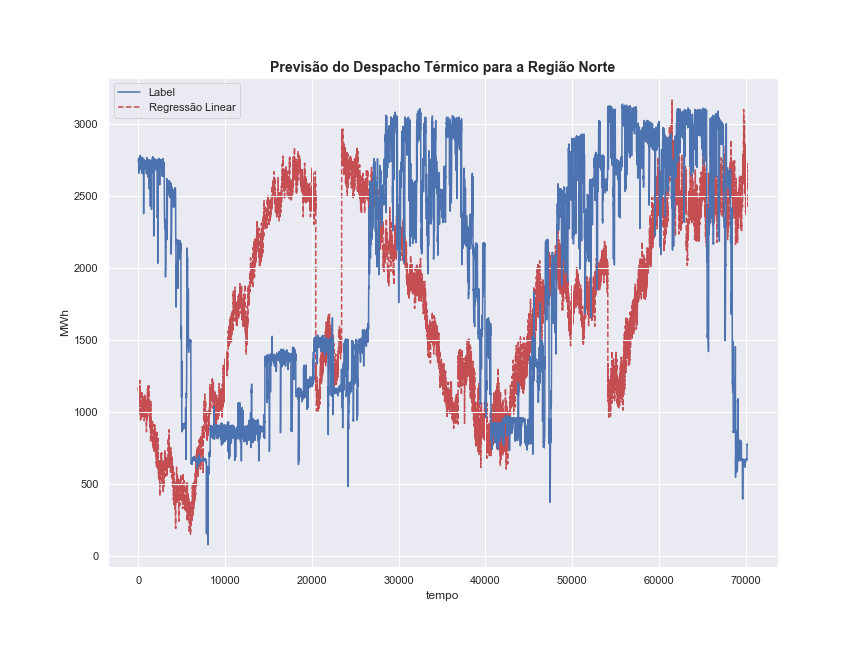

In [9]:
#define o painel
bootstrap = pn.template.BootstrapTemplate(title='MFEE FGV - Trabalho de Deep Learning - Rodrigo Fonseca e Sandro Mendes')

bootstrap.main.append(
    pn.Row(
            pn.Column(
                pn.Card(
                    'O objetivo deste painel é predizer a necessidade de despacho térmico para uma hora, em determinado subsistema elétrico, dados os parâmetros climáticos.',
                    'Para realizar as predições, siga os passos abaixo.',
                    '1.Ajuste os parâmetros meteorológicos',
                    '2.Escolha um subsistema e um modelo de previsão',
                    '3.Clique em "Calcular Despacho"',
                    '*Os parâmetros meteorológicos estão por região do país, sendo N/I o valor obtido em estaçôes meteorológicas de regiões não identificadas.',
                    '**Os valores iniciais representam as médias observadas nas estações automáticas distribuídas pelo país.',
                    title='Como usar esse painel',
                    margin=(10,10,10,10)
                ),
                modelo_drop, 
                subsistema_drop, 
                component
            ),
            pn.Column(graf_pred[1], margin=(10,10,10,10)),
    background='WhiteSmoke',
    margin=(10,10,10,10)    
    )                                
)

bootstrap.main.append(
    pn.Row(
        pn.Card(seletor, margin=(10,10,10,10), title="Parâmetros Meteorológicos"),
        margin=(10,10,10,10),
        background='WhiteSmoke'
    )
)

bootstrap.servable()

In [10]:
#chama o painel no localhost
pn.serve(bootstrap)

Launching server at http://localhost:62673
